In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df[['SibSp', 'Parch', 'Ticket', 'Embarked']]

,SibSp,Parch,Ticket,Embarked
0,1,0,A/5 21171,S
1,1,0,PC 17599,C
2,0,0,STON/O2. 3101282,S
3,1,0,113803,S
4,0,0,373450,S
...,...,...,...,...
886,0,0,211536,S
887,0,0,112053,S
888,1,2,W./C. 6607,S
889,0,0,111369,C


__SibSp__

Siblings and Spouses Aboard

__Parch__

Parents and Children Aboard

__Embarked__

Port of Embarkation (Means the port where the passanger boarded to the ship)

In [5]:
train = df.drop(['Name', 'Ticket'], axis = 1)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
imputer_median = SimpleImputer(strategy='median')
imputer_constant = SimpleImputer(strategy='constant', fill_value=0)
imputer_indicator = SimpleImputer(strategy='mean', add_indicator=True)

In [9]:
train['Age'] = imputer_mean.fit_transform(train[['Age']]).round().astype('float64')
train['Cabin'] = imputer_most_frequent.fit_transform(train[['Cabin']]).ravel()
train['Embarked'] = imputer_most_frequent.fit_transform(train[['Embarked']]).ravel()

In [10]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,B96 B98,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,30.0,1,2,23.4500,B96 B98,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [11]:
le = LabelEncoder()

In [12]:
train['Sex'] = le.fit_transform(train['Sex'])
train['Cabin'] = le.fit_transform(train['Cabin'])
train['Embarked'] = le.fit_transform(train['Embarked'])

__OneHot Encoding__

Sex, Embarked columns are OneHot encoded.

In [13]:
train = pd.get_dummies(train, columns=['Sex','Embarked'], drop_first=True, dtype=int)

In [14]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [15]:
train.head()

,Survived,Pclass,Age,Fare,Cabin,Sex_1,Embarked_1,Embarked_2,FamilySize
0,0,3,22.0,7.2500,47,1,0,1,2
1,1,1,38.0,71.2833,81,0,0,0,2
2,1,3,26.0,7.9250,47,0,0,1,1
3,1,1,35.0,53.1000,55,0,0,1,2
4,0,3,35.0,8.0500,47,1,0,1,1


In [16]:
train['Cabin'].unique()

array([ 47,  81,  55, 129, 145,  49, 111,  13,  63,  41, 101,  23,  71,
        21,  80, 142, 140, 122,  12,  91,  98,  52,  36, 116, 138, 107,
        45, 141,  61, 123,  18,  14,  69, 144,   9,  28,  43,   8, 103,
        93,  87,  78, 102,  83,  40, 134,  46,  57,  89,  54, 113,   3,
        31,  90,  62,  51,  74, 125,  72,  35,  76, 124,  65,  17,  56,
        85, 127, 146,  59, 104,  24, 131,  79, 115, 128,  10,  50,  53,
        86, 126,  97, 117, 133,   1,  25,  64,  96,  42, 121, 106,  39,
        88,  26,  27,  20,  82,  77,   2,  48,  75,   0, 135,  29,   4,
        95, 110, 114,   5,  33,   7, 108, 132,  58,  38,  34, 109,  32,
        19, 139,  73, 120,  84,  66, 137,  15, 105,  67, 100, 118,  92,
       136, 143,  22, 112,  44,  94,  11,  16,  37, 130,  68,  99, 119,
         6,  70,  30,  60])

__Clean The 'Cabin' Column__

The above Cabin data is not a good form to feed directly into most ML models, because:

-The numbers don’t have real order

-The model may assume 147 levels of magnitude

-This introduces fake relationships

This is much better than using it incorrectly.

In [17]:
train.drop(columns=['Cabin'], inplace=True)

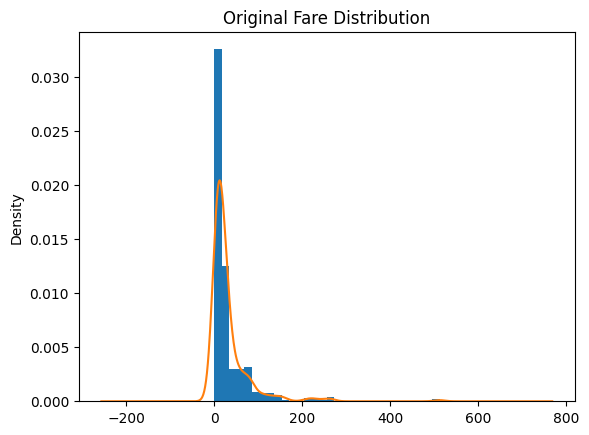

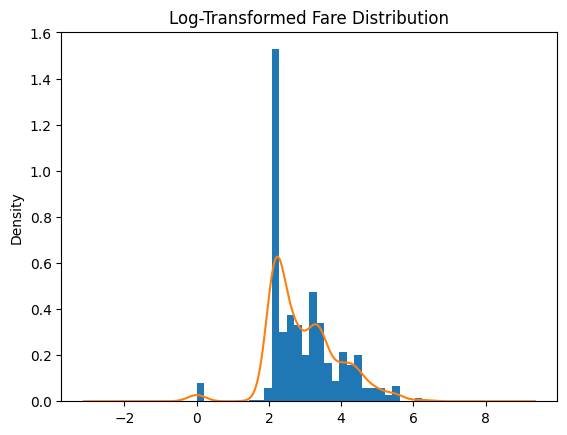

In [20]:
# Original Fare
plt.figure()
plt.hist(train['Fare'], bins=30, density=True)
train['Fare'].plot(kind='kde')
plt.title('Original Fare Distribution')
plt.show()

# Log-transformed Fare
plt.figure()
plt.hist(np.log1p(train['Fare']), bins=30, density=True)
pd.Series(np.log1p(train['Fare'])).plot(kind='kde')
plt.title('Log-Transformed Fare Distribution')
plt.show()

__What Log Transform Does__

_Reduces right skew_

Fare has many small values and a few very large ones.

Before: long right tail | After log: tail is compressed

Distribution becomes more bell-shaped (normal-like).

_Compresses large values_

Example:

5-------1.79

50------3.93

500-----6.22

*Differences between large fares shrink

*Outliers become less dominant

In [23]:
preprocessor = ColumnTransformer([
    ('age', Pipeline([
        ('imputer', imputer_mean),
        ('scaler', StandardScaler())
    ]), ['Age']),

    ('fare', Pipeline([
        ('imputer', imputer_median),
        ('log', FunctionTransformer(np.log1p, validate=False)),
        ('scaler', StandardScaler())
    ]), ['Fare'])
])

In [25]:
X = train.drop(columns=['Survived'])
y = train['Survived']

In [26]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression())
])

In [28]:
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('age', ...), ('fare', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformer

In [29]:
X_val

,Pclass,Age,Fare,Sex_1,Embarked_1,Embarked_2,FamilySize
709,3,30.0,15.2458,1,0,0,3
439,2,31.0,10.5000,1,0,1,1
840,3,20.0,7.9250,1,0,1,1
720,2,6.0,33.0000,0,0,1,2
39,3,14.0,11.2417,0,0,0,2
...,...,...,...,...,...,...,...
433,3,17.0,7.1250,1,0,1,1
773,3,30.0,7.2250,1,0,0,1
25,3,38.0,31.3875,0,0,1,7
84,2,17.0,10.5000,0,0,1,1


In [30]:
y_pred = model.predict(X_val)

In [32]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6703910614525139


In [34]:
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[94 11]
 [48 26]]


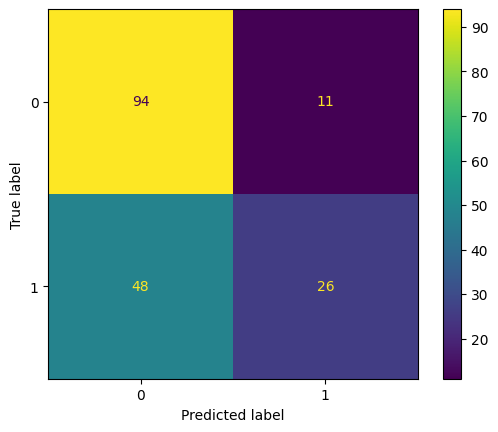

In [37]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()